## Approximation of Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [2]:
X = np.random.uniform(size=500, low=-1/2, high=1/2)
Y = 1.75 + np.sin(2*np.pi * X) + 1 * np.sin(3*np.pi * X + 1.5) + .05 * np.random.normal(size=len(X))
Y = Y/np.max(Y)

In [3]:
# set up the model
inputs = Input(shape=(1,))
z = Dense(30, activation='sigmoid')(inputs)
z = Dense(1, activation='linear')(z)
model = Model(inputs, z)

# compile the model
model.compile(loss="mse", optimizer="adam")

# train the model
history = model.fit(X, Y, epochs=2000, batch_size=8, verbose=0)

2022-01-06 22:04:00.903183: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-06 22:04:00.903447: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


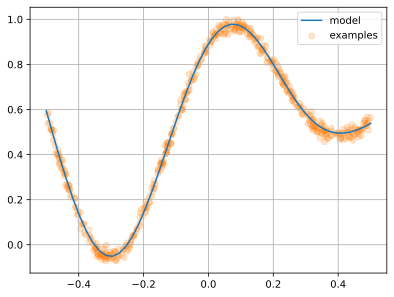

In [4]:
Xt = np.linspace(-1/2, 1/2)
Yt = model.predict(Xt)

plt.plot(Xt, Yt, color='C0', label='model')
plt.scatter(X,Y, alpha=.2, color='C1', label='examples')
plt.legend()
plt.grid()